In [1]:
import torch
import numpy as np
from torch import nn
import my_utils as mu
import torchvision
from torchvision import transforms 
from torch.utils import data
import matplotlib.pyplot as plt
import torch.nn.functional as F

from torchvision import datasets

from torch.utils.data import Dataset

from torchvision.transforms import ToTensor




In [2]:

trans = transforms.ToTensor()
mnist_train = torchvision.datasets.FashionMNIST(
    root="../data", train=True, transform=trans, download=True)
mnist_test = torchvision.datasets.FashionMNIST(
    root="../data", train=False, transform=trans, download=True)


  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting ../data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ../data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting ../data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ../data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting ../data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ../data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting ../data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/FashionMNIST/raw



In [3]:
#load dataset
trainDataLoader = torch.utils.data.DataLoader(dataset=mnist_train, batch_size=20, shuffle=True)
testDataLoader = torch.utils.data.DataLoader(dataset=mnist_test, batch_size=20, shuffle=True)

In [4]:
def get_fashion_mnist_labels(labels):  
    """Return text labels for the Fashion-MNIST dataset."""
    text_labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
                   'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
    return [text_labels[int(i)] for i in labels]

In [5]:
# Examine a sample
dataiter = iter(trainDataLoader)
images, labels = dataiter.next()
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([20, 1, 28, 28])
torch.Size([20])


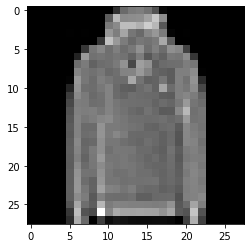

In [6]:
plt.imshow(images[19].numpy().squeeze(), cmap = 'Greys_r')

In [16]:
class Net(torch.nn.Module):
    def __init__(self, num_inputs, num_hidden,num_hiddenn,num_hiddennn, num_outputs):
        super(Net, self).__init__()
        self.num_inputs = num_inputs
        self.num_hidden = num_hidden
        self.num_outputs = num_outputs
        self.Linear1 = nn.Linear(num_inputs,  num_hidden)
        self.Linear2 = nn.Linear(num_hidden,  num_hiddenn)
        self.Linear3 = nn.Linear(num_hiddenn, num_hiddennn)
        self.Linear4 = nn.Linear(num_hiddennn, num_outputs)
        
        W1=torch.nn.init.normal_(self.Linear1.weight, std=0.01) #init the weights
        W2=torch.nn.init.normal_(self.Linear2.weight, std=0.01) #init the weights  
        W3=torch.nn.init.normal_(self.Linear3.weight, std=0.01) #init the weights
        W4=torch.nn.init.normal_(self.Linear4.weight, std=0.01) #init the weights
        B1 = torch.nn.init.zeros_(self.Linear1.bias) #init the bias
        B2 = torch.nn.init.zeros_(self.Linear2.bias) #init the bias
        B3 = torch.nn.init.zeros_(self.Linear3.bias) #init the bias
        B4 = torch.nn.init.zeros_(self.Linear4.bias) #init the bias

        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()
    def forward(self, x):

        patch=(20,1)
        x2d = x.reshape(1,1,-1,num_inputs)
        h,w = patch
        c=x2d.size(1)
        
        # unfold(dimension, size, step)
        patches = x2d.unfold(2,h,1).unfold(3,w,1).transpose(1,3).reshape(-1, c, h, w)
        #print(patches.shape)
        #print(patches) # result

        #x = x.unfold(1,1,28)
        x = patches.view(num_inputs, -1)

        x = torch.t(x)
        x = self.Linear1(x)
        x = self.relu(x)
        o1 = self.Linear2(x)
        
        #o1 = torch.t(o1)
        o = self.Linear3(o1)
        o = self.relu(o)

        o2 = self.Linear4(o)
      
        return o2

num_inputs, num_hidden,num_hiddenn,num_hiddennn, num_outputs = 784, 256, 128, 64, 10
net = Net(num_inputs, num_hidden,num_hiddenn,num_hiddennn, num_outputs)


In [17]:
loss = nn.CrossEntropyLoss()
lr, wd = 0.1, 0


In [18]:
updater = torch.optim.SGD(net.parameters(), lr=lr, weight_decay=wd) 


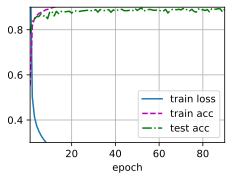

In [19]:
num_epochs=90
mu.train_ch3(net, trainDataLoader, testDataLoader, loss, num_epochs, updater)

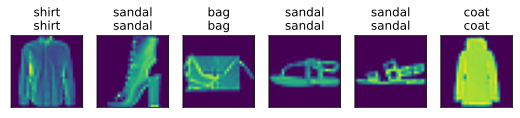

In [21]:
mu.predict_ch3(net, trainDataLoader)


In [22]:
mu.evaluate_accuracy(net, testDataLoader)

0.8913